In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import libs/packages here, set constant number

In [2]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
TOP_RANK = 10

### import 2014

In [4]:
# df = pd.read_excel("H-1B_FY14_Q4.xlsx")
# pickle_out = open("2014.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

### import  2015 

In [5]:
# df = pd.read_excel("H-1B_Disclosure_Data_FY15_Q4.xlsx")
# pickle_out = open("2015.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

### import  2016

In [6]:
# df = pd.read_excel("H-1B_Disclosure_Data_FY16.xlsx")
# pickle_out = open("2016.pickle", "wb")
# pickle.dump(df, pickle_out)
# pickle_out.close()

Define functions here  

In [19]:
def rank_bar(item_counts,top_ranking=TOP_RANK):
    """
    item_counts: dict , {items : items occurrence time}
    if there is no setting on TOP_RANK, default = 10
    """
    print(item_counts.iloc[:top_ranking])
    bar_plot = sns.barplot(x=item_counts.iloc[:top_ranking].index,y=item_counts.iloc[:top_ranking])
    loc, xticklabels = plt.xticks()
    bar_plot.set_xticklabels(xticklabels, rotation=90)
    plt.show()
    
    
def field_bar(df,head):
    temp = [ i for i in list(df) if re.search(head,i)]
    if temp:       
        head = temp[0]
        df_col = df[head]
        item_counts = df[head].value_counts()
#         print(item_counts)
        rank_bar(item_counts)
        
def remove_duplicated_row(df):
    print(df.shape)
    print(df.duplicated().value_counts().index)
    df = df[~df.duplicated(keep='first')] 
    print(df.shape)
    return df

def remove_nan_row(df,important_list):
    """
    Regex match items in important_list and remove any row with NaN in these 
    """
    id_stat = [head for head in list(df) for item in important_list if re.search(item, head) ]
#     print(df[id_stat].isnull().sum())
    df = df.dropna(subset=id_stat)
    print("after dropna")
    print(df[id_stat].isnull().sum())
    return df,id_stat

In [4]:
pickle_in = open("2014.pickle", "rb")
df_2014 = pickle.load(pickle_in)
pickle_in = open("2015.pickle", "rb")
df_2015 = pickle.load(pickle_in)
pickle_in = open("2016.pickle", "rb")
df_2016 = pickle.load(pickle_in)

df_list = [df_2014,df_2015,df_2016]
year_list = ['2014','2015','2016']

# print fileds list 
for j, df in enumerate(df_list):
    print(year_list[j],list(df),"\n")


2014 ['LCA_CASE_NUMBER', 'STATUS', 'LCA_CASE_SUBMIT', 'DECISION_DATE', 'VISA_CLASS', 'LCA_CASE_EMPLOYMENT_START_DATE', 'LCA_CASE_EMPLOYMENT_END_DATE', 'LCA_CASE_EMPLOYER_NAME', 'LCA_CASE_EMPLOYER_ADDRESS', 'LCA_CASE_EMPLOYER_CITY', 'LCA_CASE_EMPLOYER_STATE', 'LCA_CASE_EMPLOYER_POSTAL_CODE', 'LCA_CASE_SOC_CODE', 'LCA_CASE_SOC_NAME', 'LCA_CASE_JOB_TITLE', 'LCA_CASE_WAGE_RATE_FROM', 'LCA_CASE_WAGE_RATE_TO', 'LCA_CASE_WAGE_RATE_UNIT', 'FULL_TIME_POS', 'TOTAL_WORKERS', 'LCA_CASE_WORKLOC1_CITY', 'LCA_CASE_WORKLOC1_STATE', 'PW_1', 'PW_UNIT_1', 'PW_SOURCE_1', 'OTHER_WAGE_SOURCE_1', 'YR_SOURCE_PUB_1', 'LCA_CASE_WORKLOC2_CITY', 'LCA_CASE_WORKLOC2_STATE', 'PW_2', 'PW_UNIT_2', 'PW_SOURCE_2', 'OTHER_WAGE_SOURCE_2', 'YR_SOURCE_PUB_2', 'LCA_CASE_NAICS_CODE'] 

2015 ['CASE_NUMBER', 'CASE_STATUS', 'CASE_SUBMITTED', 'DECISION_DATE', 'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME', 'EMPLOYER_ADDRESS1', 'EMPLOYER_ADDRESS2', 'EMPLOYER_CITY', 'EMPLOYER_STATE', 'EMPLOYER_POSTAL_

Remove the duplicated rows and keep only the first appear

In [5]:
for j, df in enumerate(df_list):
    df = remove_duplicated_row(df)

(519504, 35)
Index([False], dtype='object')
(519504, 35)
(618804, 40)
Index([False, True], dtype='object')
(618803, 40)
(647852, 40)
Index([False], dtype='object')
(647852, 40)


Remove the rows with NaN in those columns have key words in the list "col_notNaN"

In [8]:
col_notNaN = ['CASE_NUMBER', 'STATUS', 'CASE_SUBMIT', 'DECISION_DATE', 
              'VISA_CLASS', 'EMPLOYMENT_START_DATE', 'EMPLOYMENT_END_DATE', 'EMPLOYER_NAME',
             "WAGE.*UNIT","WAGE.*RATE"]

for df in df_list:
    df = remove_nan_row(df,col_notNaN)

after dropna
LCA_CASE_NUMBER                   0
STATUS                            0
LCA_CASE_SUBMIT                   0
DECISION_DATE                     0
VISA_CLASS                        0
LCA_CASE_EMPLOYMENT_START_DATE    0
LCA_CASE_EMPLOYMENT_END_DATE      0
LCA_CASE_EMPLOYER_NAME            0
LCA_CASE_WAGE_RATE_FROM           0
LCA_CASE_WAGE_RATE_TO             0
LCA_CASE_WAGE_RATE_UNIT           0
LCA_CASE_WAGE_RATE_UNIT           0
dtype: int64
after dropna
CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
VISA_CLASS               0
EMPLOYMENT_START_DATE    0
EMPLOYMENT_END_DATE      0
EMPLOYER_NAME            0
WAGE_RATE_OF_PAY         0
WAGE_UNIT_OF_PAY         0
dtype: int64
after dropna
CASE_NUMBER              0
CASE_STATUS              0
CASE_SUBMITTED           0
DECISION_DATE            0
VISA_CLASS               0
EMPLOYMENT_START_DATE    0
EMPLOYMENT_END_DATE      0
EMPLOYER_NAME            0
WAGE_RATE_OF_PAY_

Remove the those rows the date of submit is later than the contract ends date, not reasonable in logic 

In [29]:
for df in df_list:
    field_list = [i for i in list(df) if re.search("CASE_SUBMIT",i) or re.search("EMPLOYMENT_END_DATE",i)]
    df[field_list[1]]  = pd.to_datetime(df[field_list[1]],errors='coerce')
    mask = ((df[field_list[1]]-df[field_list[0]]).astype('timedelta64[D]') > 0)
    df = df[mask]

In [17]:
for j, df in enumerate(df_list):
    print(year_list[j])
    # convert unit into int for later total calculation
    pay_unit = [ i for i in list(df) if re.search("WAGE.*UNIT",i)][0]
    wage_unit = df[pay_unit].values
    salary_unit=np.array(wage_unit)
    salary_unit[salary_unit=='Year']=1
    salary_unit[salary_unit=='Week']=52
    salary_unit[salary_unit=='Bi-Weekly']=26
    salary_unit[salary_unit=='Month']=12
    salary_unit[salary_unit=='Hour']=416

    start_salary = []
    pay_rate = [ i for i in list(df) if re.search("WAGE.*RATE",i)][0]
    if df[pay_rate].dtype == 'object':
        for i in  df[pay_rate].values:
            try:
                temp = str(i).replace(" ", "")
                temp = str(temp).split("-")[0]
                temp = float(temp)
                start_salary.append(temp)
            except ValueError:
                start_salary.append(0.0)
    else:
        start_salary = df[pay_rate]
    start_salary = np.array(start_salary)
    start_salary = start_salary.astype(float)
    df["total_salary"] = np.multiply(salary_unit,start_salary)
    print(df["total_salary"].describe())
    print("\n CERTIFIED")
    head = [ i for i in list(df) if re.search("",i)][0]
    mask = (df[head] == 'CERTIFIED')
    print(df[mask]["total_salary"].describe())
    print("\n Not CERTIFIED")
    mask = (df[head] != 'CERTIFIED')
    print(df[mask]["total_salary"].describe())
    print("\n")

2014
count     519465.0
unique     44782.0
top        60000.0
freq       33186.0
Name: total_salary, dtype: float64

 CERTIFIED
count     455144.0
unique     41107.0
top        60000.0
freq       29439.0
Name: total_salary, dtype: float64

 Not CERTIFIED
count     64321.0
unique    13412.0
top       60000.0
freq       3747.0
Name: total_salary, dtype: float64


2015
count     618774.0
unique     48338.0
top        60000.0
freq       45531.0
Name: total_salary, dtype: float64

 CERTIFIED
count     547278.0
unique     44740.0
top        60000.0
freq       40661.0
Name: total_salary, dtype: float64

 Not CERTIFIED
count     71496.0
unique    13577.0
top       60000.0
freq       4870.0
Name: total_salary, dtype: float64


2016
count     647842.0
unique     49351.0
top        60000.0
freq       46498.0
Name: total_salary, dtype: float64

 CERTIFIED
count     569645.0
unique     45652.0
top        60000.0
freq       39958.0
Name: total_salary, dtype: float64

 Not CERTIFIED
count     78197.0

2014
60000.0     29439
70000.0     11035
65000.0     10942
80000.0      8344
75000.0      7544
90000.0      6686
100000.0     6316
85000.0      5145
72000.0      4528
110000.0     4277
Name: total_salary, dtype: int64


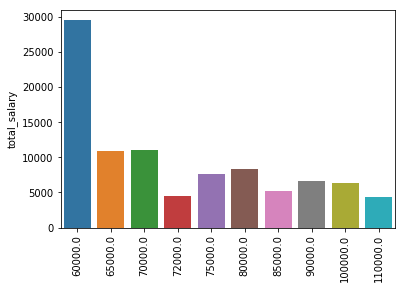

2015
60000.0     40661
65000.0     13614
70000.0     12531
75000.0      9537
80000.0      9407
90000.0      7908
100000.0     7752
85000.0      6232
72000.0      5771
110000.0     5258
Name: total_salary, dtype: int64


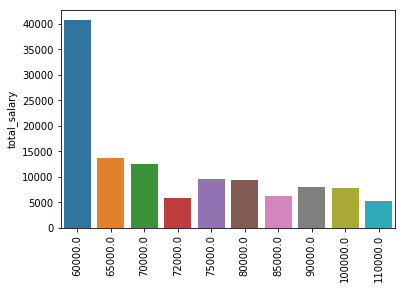

2016
60000.0     39958
65000.0     14992
70000.0     13626
75000.0     10937
80000.0      9347
90000.0      8009
100000.0     7150
85000.0      6626
72000.0      5237
110000.0     5158
Name: total_salary, dtype: int64


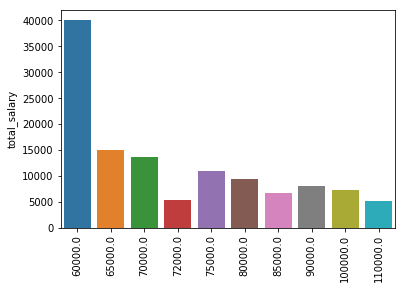

In [20]:
for j, df in enumerate(df_list):
    print(year_list[j])
    head = [ i for i in list(df) if re.search("STATUS",i)][0]
    mask = (df[head] == 'CERTIFIED')
    field_bar(df[mask],"total_salary")

2014
60000.0     531
65000.0     250
70000.0     231
75000.0     197
80000.0     192
90000.0     187
50000.0     173
55000.0     158
100000.0    145
45000.0     116
Name: total_salary, dtype: int64


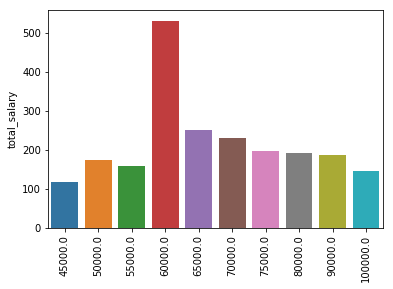

2015
60000.0     487
65000.0     242
70000.0     214
75000.0     207
50000.0     187
80000.0     169
90000.0     145
45000.0     142
100000.0    124
85000.0     124
Name: total_salary, dtype: int64


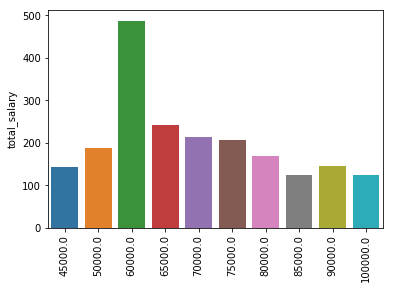

2016
60000.0     529
65000.0     204
75000.0     199
70000.0     167
80000.0     142
90000.0     126
100000.0    123
50000.0     113
55000.0      94
85000.0      86
Name: total_salary, dtype: int64


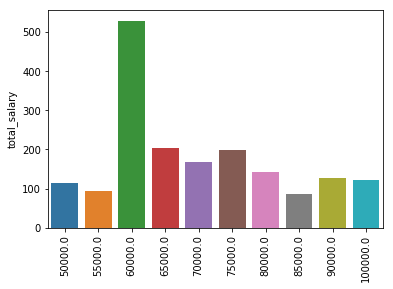

In [21]:
for j, df in enumerate(df_list):
    print(year_list[j])
    head = [ i for i in list(df) if re.search("STATUS",i)][0]
    mask = (df[head] == 'DENIED')
#     print(df[mask]["total_salary"].value_counts())
    field_bar(df[mask],"total_salary")

Which TOP10 job positions, employer, working city and job titles in the last three years 

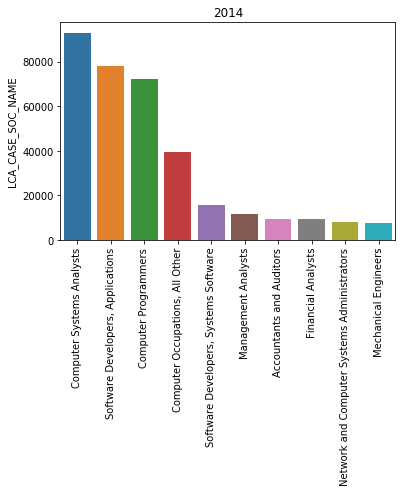

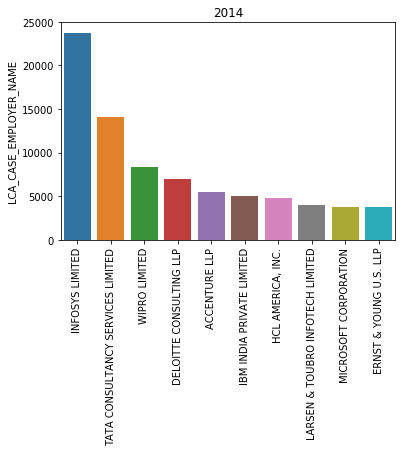

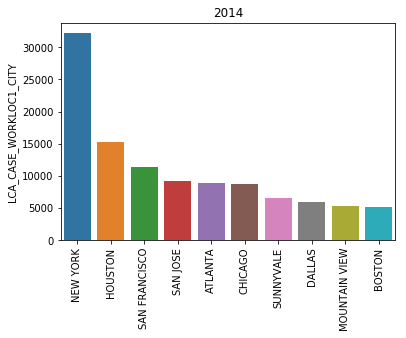

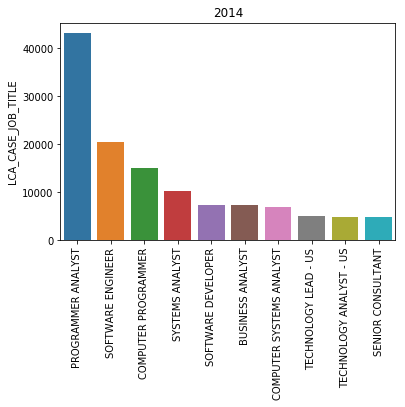

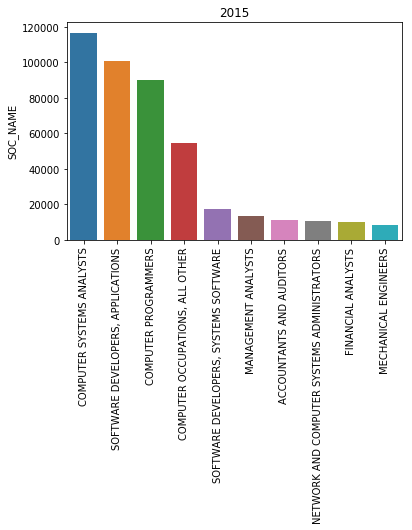

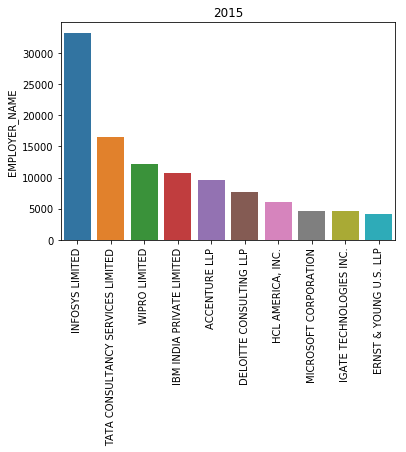

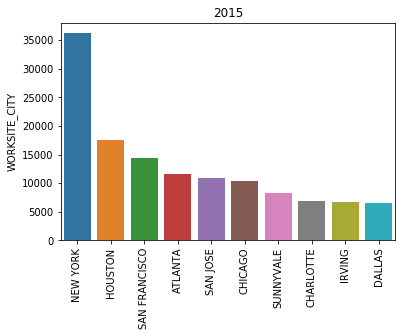

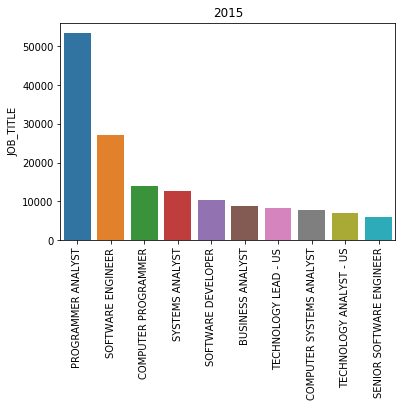

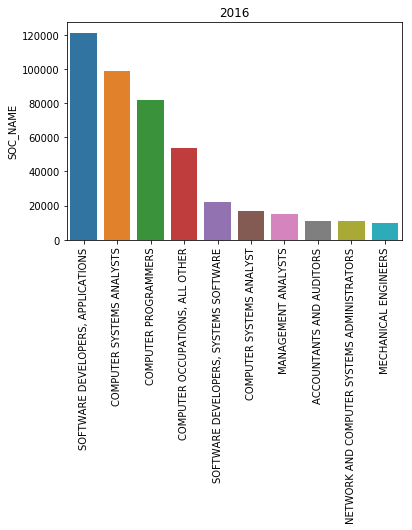

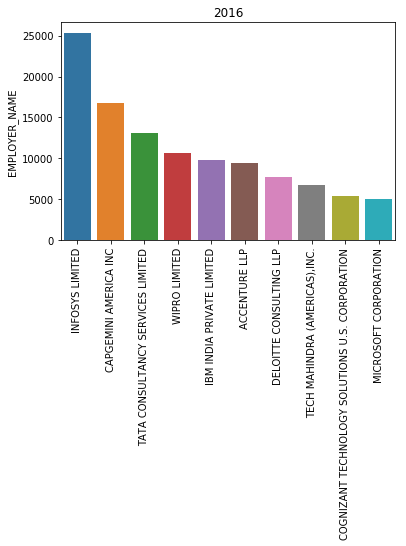

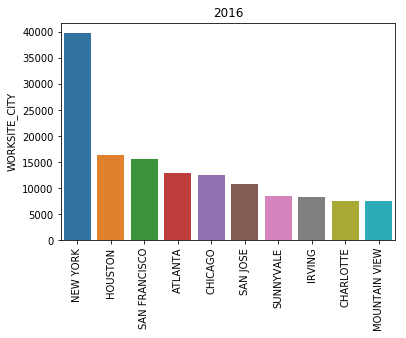

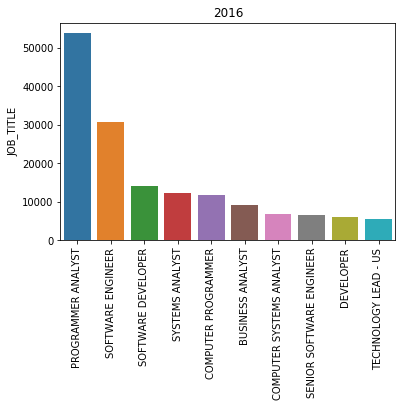

In [12]:
field_list = ['SOC_NAME','EMPLOYER_NAME','WORK.*CITY','JOB_TITLE']
i = 0
for df in df_list:
    year = year_list[i]
    i +=1
    for head in field_list:
        plt.title(year)
        field_bar(df,head)

Which month is the most applications being decided

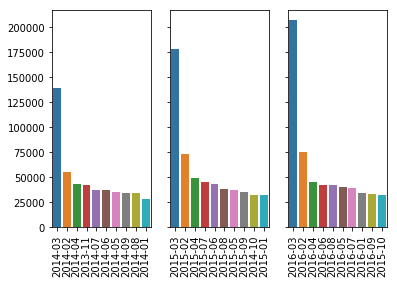

In [30]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    head = [ i for i in list(df) if re.search("DECISION_DATE",i)][0]
    # '%Y-%m-%d'
    df['decision_time'] = [pd.to_datetime(str(date)).strftime('%Y-%m') for date in  df[head].values]
    item_counts=df['decision_time'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

Which month is the most applications being submitted

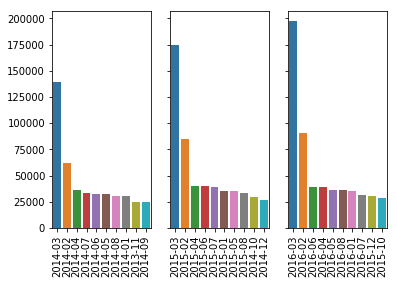

In [31]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    head = [ i for i in list(df) if re.search("CASE_SUBMIT",i)][0]
    df['submit_time'] = [pd.to_datetime(str(date)).strftime('%Y-%m') for date in df[head].values]
    item_counts=df['submit_time'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

How long time for an application from submit to deside, most are decided in 6days 

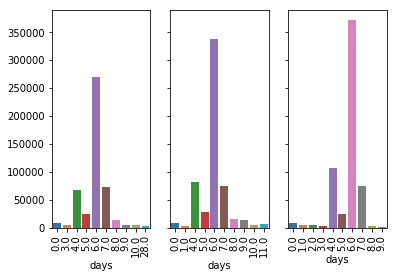

In [104]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    begin = [ i for i in list(df) if re.search("CASE_SUBMIT",i)][0]
    end = [ i for i in list(df) if re.search("DECISION_DATE",i)][0]
    df['time_cost'] = np.around(((df[end]-df[begin]).astype('timedelta64[D]')))
    item_counts=df['time_cost'].value_counts().iloc[:10]
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(sorted(item_counts.index), rotation=90)
    bar_plot.set_xlabel('days')
plt.show()

How long are the most contracts?

2014 
 3.0    464451
2.0     31013
1.0     19878
0.0      4147
4.0         2
5.0         1
dtype: int64
2015 
 3.0    557401
2.0     36585
1.0     21543
0.0      3244
4.0         2
dtype: int64
2016 
 3.0    590683
2.0     36002
1.0     18696
0.0      2438
4.0         1
dtype: int64


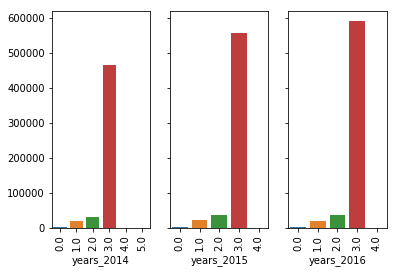

In [30]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    begin = [ i for i in list(df) if re.search("EMPLOYMENT_START_DATE",i)][0]
    end = [ i for i in list(df) if re.search("EMPLOYMENT_END_DATE",i)][0]
    # replace invalid format date with NaN 
#     df[end]  = pd.to_datetime(df[end],errors='coerce') 
    df[begin]  = pd.to_datetime(df[begin],errors='coerce')
    
    df = df.dropna(subset =[begin,end])
    delta_days = pd.Series((df[end]-df[begin]).astype('timedelta64[D]'))
    # the gap between two dates must > 0
    delta_days = delta_days[delta_days >0] 
    delta_years = pd.Series(np.around(delta_days/365))
    item_counts = delta_years.value_counts().iloc[:10]
    print(year_list[j])
    print(item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot.set_xticklabels(sorted(item_counts.index), rotation=90)
    bar_plot.set_xlabel('years'+"_"+year_list[j])
plt.show()

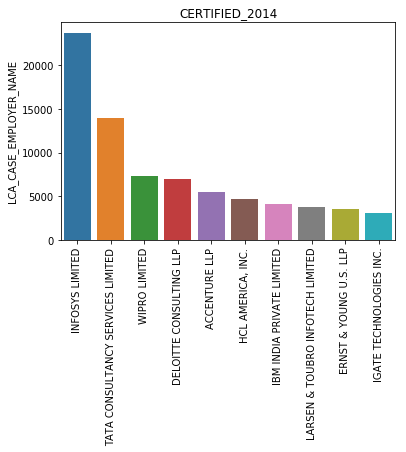

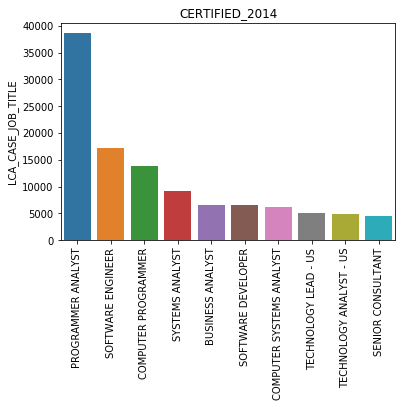

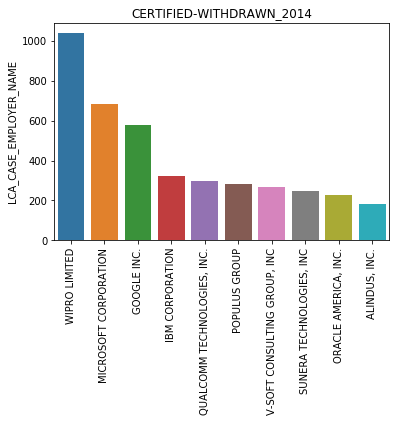

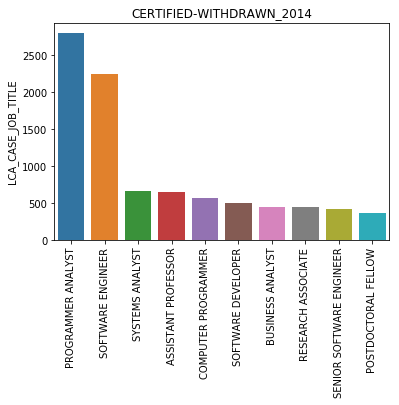

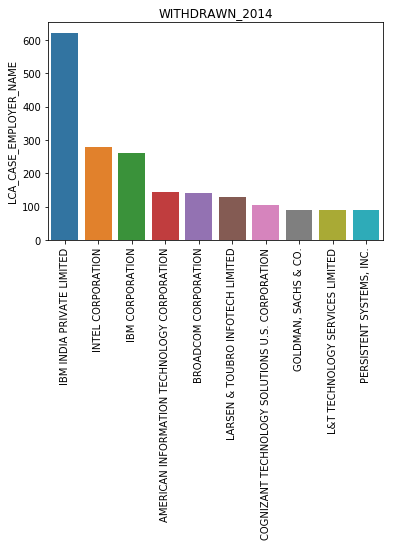

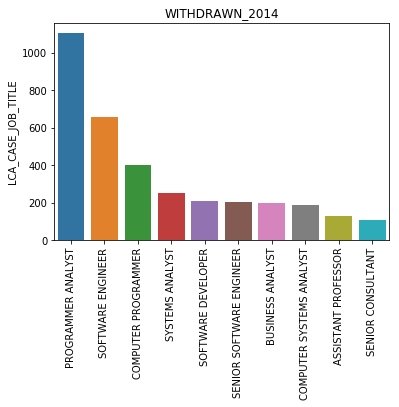

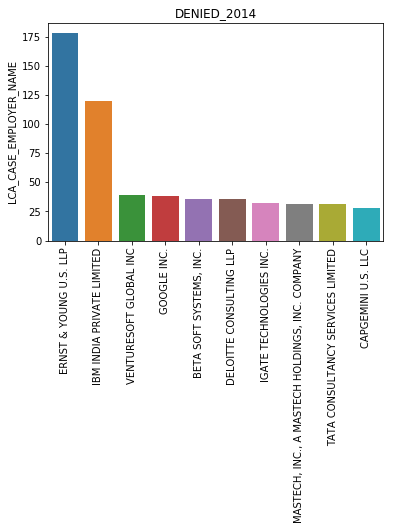

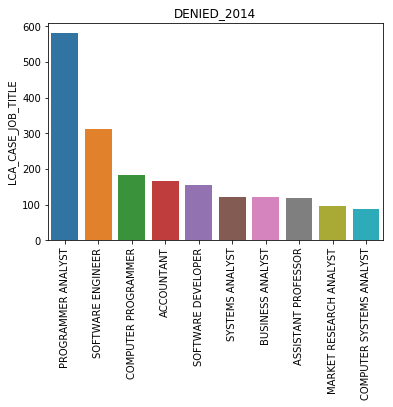

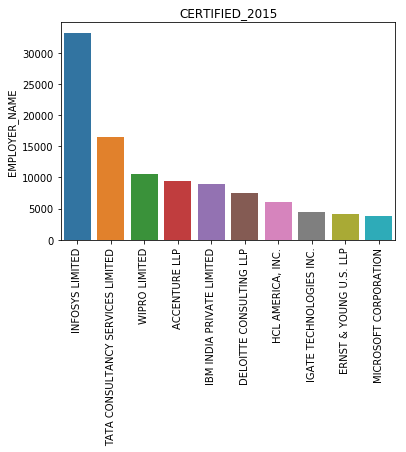

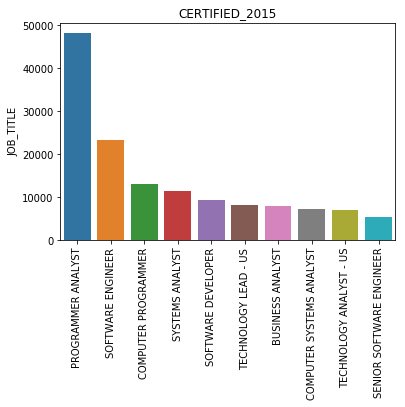

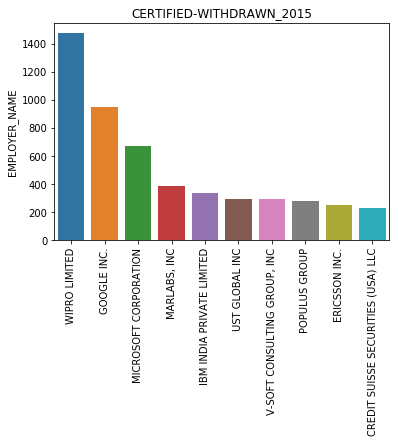

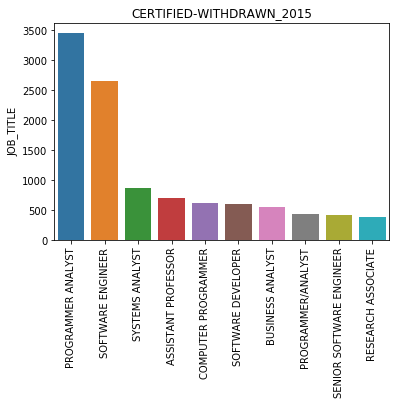

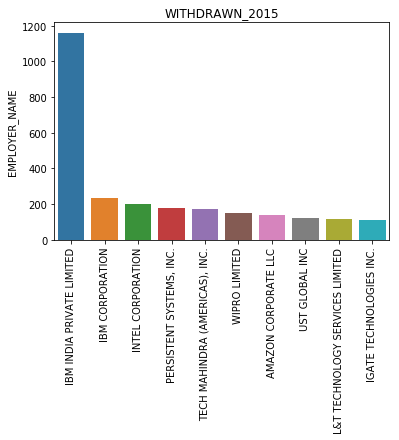

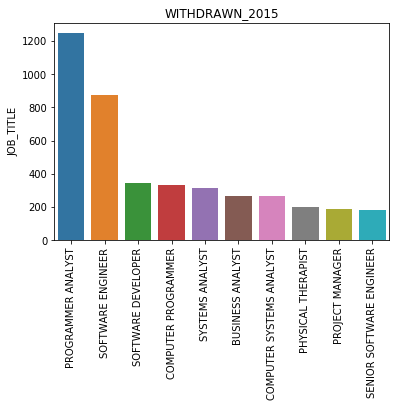

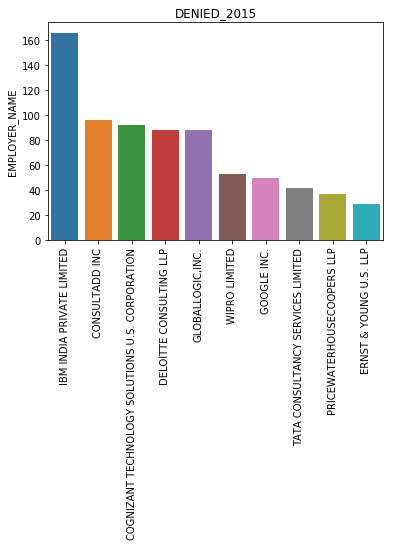

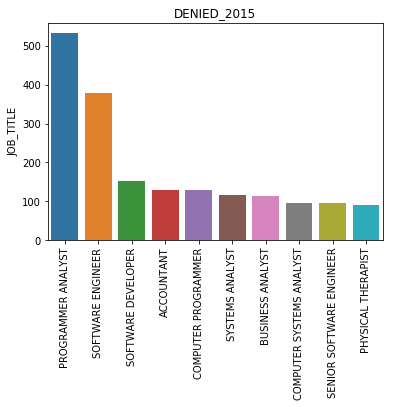

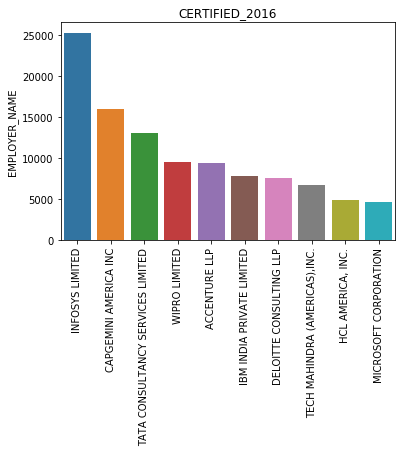

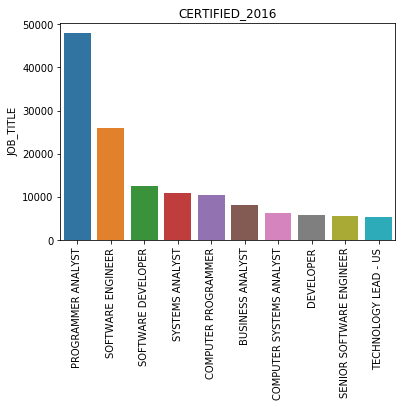

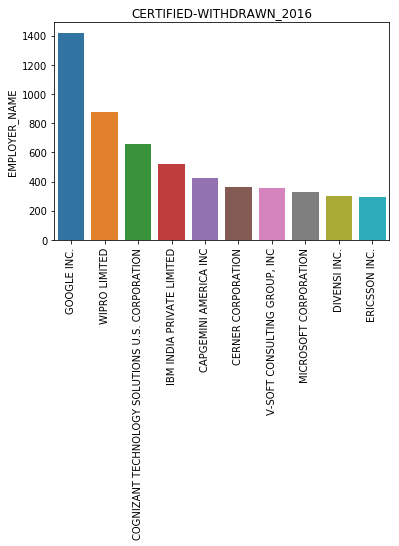

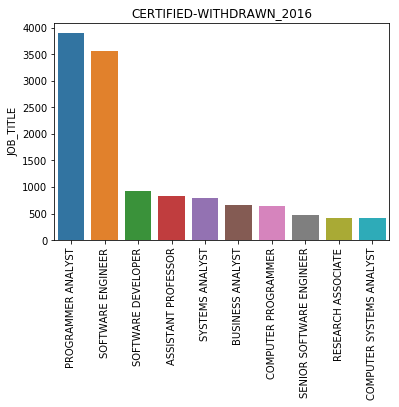

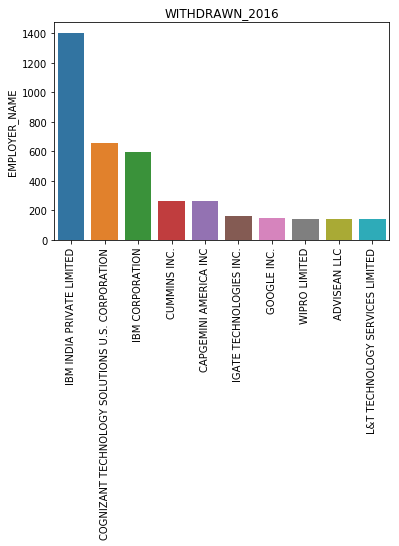

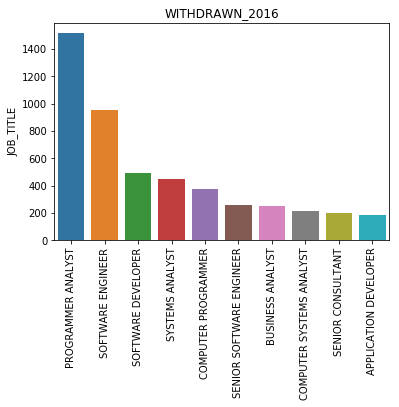

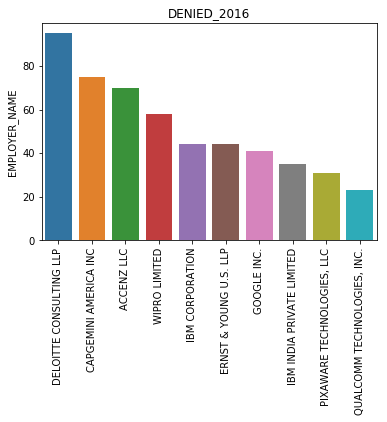

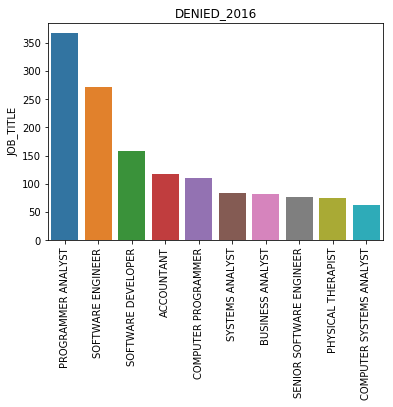

In [135]:
#the valid statuses types remain the same for all the time we extract this information from 2014
head = [ i for i in list(df_2014) if re.search("STATUS",i)][0]
valid_status_list = df_2014[head].value_counts().iloc[:4].index.values

for i, df in enumerate(df_list):
    head = [ i for i in list(df) if re.search("STATUS",i)][0]
    year = year_list[i]
    for stat in valid_status_list:
        query = [ i for i in list(df) if re.search("EMPLOYER",i)][0]
        rank = df[df[head]==stat][query].value_counts().iloc[:10]
        plt.title(stat+"_"+year)
        rank_bar(rank,10)
        
        query = [ i for i in list(df) if re.search("JOB_TITLE",i)][0]
        rank = df[df[head]==stat][query].value_counts().iloc[:10]
        plt.title(stat+"_"+year)
        rank_bar(rank,10)

In [45]:
head = [ i for i in list(df_2014) if re.search("STATUS",i)][0]
valid_status_list = df_2014[head].value_counts().iloc[:4].index.values

Visa being "CERTIFIED" distribution

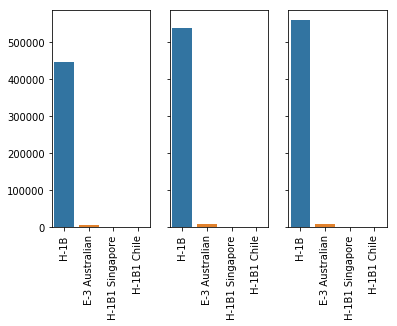

In [32]:
fig, axn = plt.subplots(1,len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("VISA_CLASS",i)][0]
    item_counts = df[df[result_head] == 'CERTIFIED'][query_heard].value_counts()
    total = df[df[result_head] == 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

Ratio of Top 10 Employer/among all results which are "CERTIFIED"

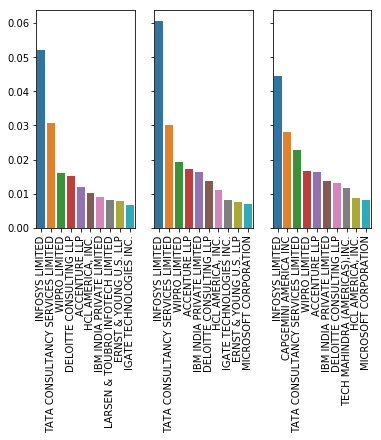

In [37]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("EMPLOYER_NAME",i)][0]
    item_counts = df[df[result_head] == 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] == 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

Ratio of Top 10 Employer/among all results except "CERTIFIED"

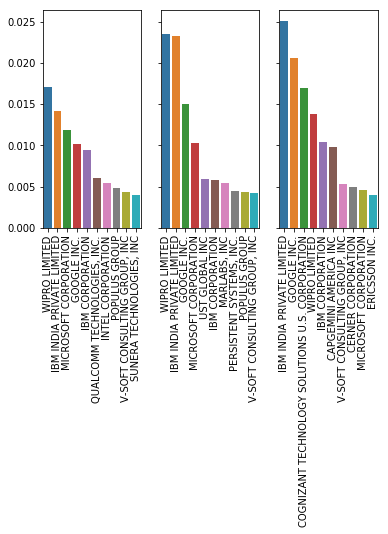

In [44]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("EMPLOYER_NAME",i)][0]
    item_counts = df[df[result_head] != 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] != 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

Top 10 cities where the applications are 'CERTIFIED'

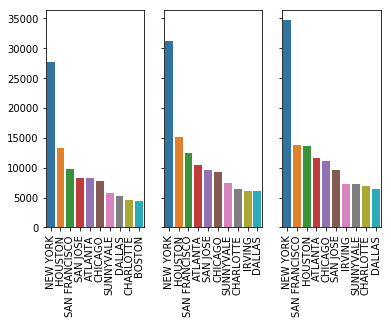

In [46]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    item_counts = df[df[result_head] == 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] == 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

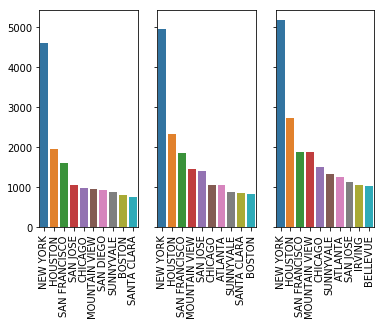

In [47]:
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    query_heard = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    item_counts = df[df[result_head] != 'CERTIFIED'][query_heard].value_counts()[:10]
    total = df[df[result_head] != 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

In New York , what kinds of job titles are CERTIFIED or not CERTIFIED most ? 

MOST CERTIFIED Job Title


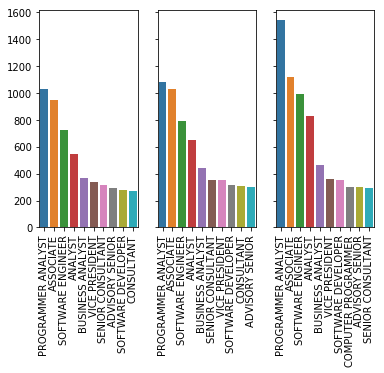

Most not CERTIFIED Job Title


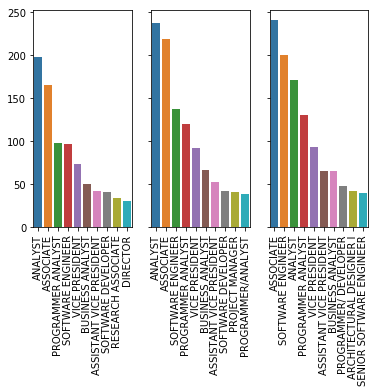

In [51]:
head = [ i for i in list(df_2014) if re.search("STATUS",i)][0]
valid_status_list = df_2014[head].value_counts().iloc[:4].index.values
fig, axn = plt.subplots(1, len(df_list), sharey=True)
print("MOST CERTIFIED Job Title")
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    workcity_head = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    query_heard = [i for i in list(df) if re.search("JOB_TITLE",i)][0]
    mask = (df[result_head] == 'CERTIFIED') & (df[workcity_head] == 'NEW YORK')
    item_counts = df[mask][query_heard].value_counts()[:10]
    total = df[df[result_head] == 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()

print("Most not CERTIFIED Job Title")
head = [ i for i in list(df_2014) if re.search("STATUS",i)][0]
valid_status_list = df_2014[head].value_counts().iloc[:4].index.values
fig, axn = plt.subplots(1, len(df_list), sharey=True)
for j, ax in enumerate(axn.flat):
    df = df_list[j]
    result_head = [ i for i in list(df) if re.search("STATUS",i)][0]
    workcity_head = [i for i in list(df) if re.search("WORK.*CITY",i)][0]
    query_heard = [i for i in list(df) if re.search("JOB_TITLE",i)][0]
    mask = (df[result_head] != 'CERTIFIED') & (df[workcity_head] == 'NEW YORK')
    item_counts = df[mask][query_heard].value_counts()[:10]
    total = df[df[result_head] != 'CERTIFIED'][query_heard].shape[0]
#     print( item_counts)
    bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values)
#     bar_plot = sns.barplot(ax=ax,x=item_counts.index,y=item_counts.values/total)
    bar_plot.set_xticklabels(item_counts.index, rotation=90)
plt.show()